# Анализ анкет первокурсников 2023 года поступления
---

## Очистка данных

In [1]:
import pandas as pd

path = "23.csv"
df = pd.read_csv(path, sep=';')

<ipython-input-1-e43ee2872a2f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = df.iloc[:,:6]
df.head()

,Студент,Паскаль,Питон,C#,C++,Java
0,Акулов Михаил Игоревич,2.0,5.0,NaN,NaN,NaN
1,Алиева Самира Мехмановна,2.0,6.0,7.0,2.0,NaN
2,Алыпов Михаил Алексеевич,NaN,NaN,NaN,NaN,NaN
3,Арасанов Степан Денисович,NaN,NaN,NaN,NaN,NaN
4,Ахунов Дмитрий Михайлович,8.0,7.0,9.0,5.0,NaN


In [3]:
# Удаляем строки, где все значения (кроме индекса) пустые или пробелы
df = df.dropna(how='all', subset=df.columns[1:])  # Удаляем строки, где все значения пустые (кроме индекса)

# Удаляем пробелы из строк и фильтруем пустые строки
df = df[~df.apply(lambda row: row.str.strip().eq('').all(), axis=1)]

df.head()

,Студент,Паскаль,Питон,C#,C++,Java
0,Акулов Михаил Игоревич,2.0,5.0,NaN,NaN,NaN
1,Алиева Самира Мехмановна,2.0,6.0,7.0,2.0,NaN
4,Ахунов Дмитрий Михайлович,8.0,7.0,9.0,5.0,NaN
5,Банников Владислав Олегович,4.0,5.0,NaN,NaN,NaN
7,Бачурина Юлия Владимировна,2.0,5.0,NaN,6.0,NaN


---
## Популярность языков среди первокурсников 2023

In [4]:
# Подсчёт количества студентов, заполнивших каждый столбец с языками
filled_counts = df.iloc[:, 1:].notna().sum()

# Вычисление популярности в процентах
popularity = (filled_counts / len(df) * 100).round(2)

print("Популярность языков среди студентов (%):")
print(popularity)

Популярность языков среди студентов (%):
Паскаль    80.82
Питон      90.41
C#         16.44
C++        28.77
Java        6.85
dtype: float64


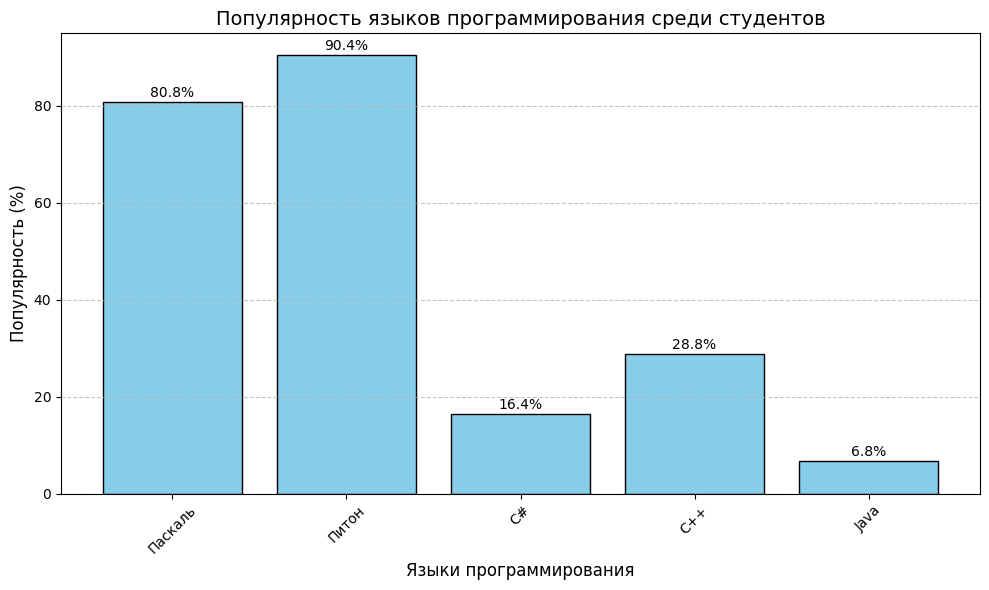

In [5]:
import matplotlib.pyplot as plt

# Построение столбчатого графика
plt.figure(figsize=(10, 6))
plt.bar(popularity.index, popularity.values, color='skyblue', edgecolor='black')

# Подписи осей и заголовок
plt.xlabel('Языки программирования', fontsize=12)
plt.ylabel('Популярность (%)', fontsize=12)
plt.title('Популярность языков программирования среди студентов', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Отображение значений над столбцами
for i, val in enumerate(popularity.values):
    plt.text(i, val + 1, f"{val:.1f}%", ha='center', fontsize=10)

# Показ графика
plt.tight_layout()
plt.show()

---
## Общий средний уровень владения и по языкам

In [6]:
# Считаем средний уровень владения каждым языком (игнорируя NaN)
avg_level_per_language = df.iloc[:, 1:].mean()

# Средний уровень владения языками среди всех студентов
avg_level_all_students = avg_level_per_language.mean()

print("Средний уровень владения каждым языком:")
print(avg_level_per_language)

print(f"Средний уровень владения языками среди всех студентов: {avg_level_all_students:.2f}")

Средний уровень владения каждым языком:
Паскаль    4.169492
Питон      6.166667
C#         5.583333
C++        3.285714
Java       4.400000
dtype: float64
Средний уровень владения языками среди всех студентов: 4.72


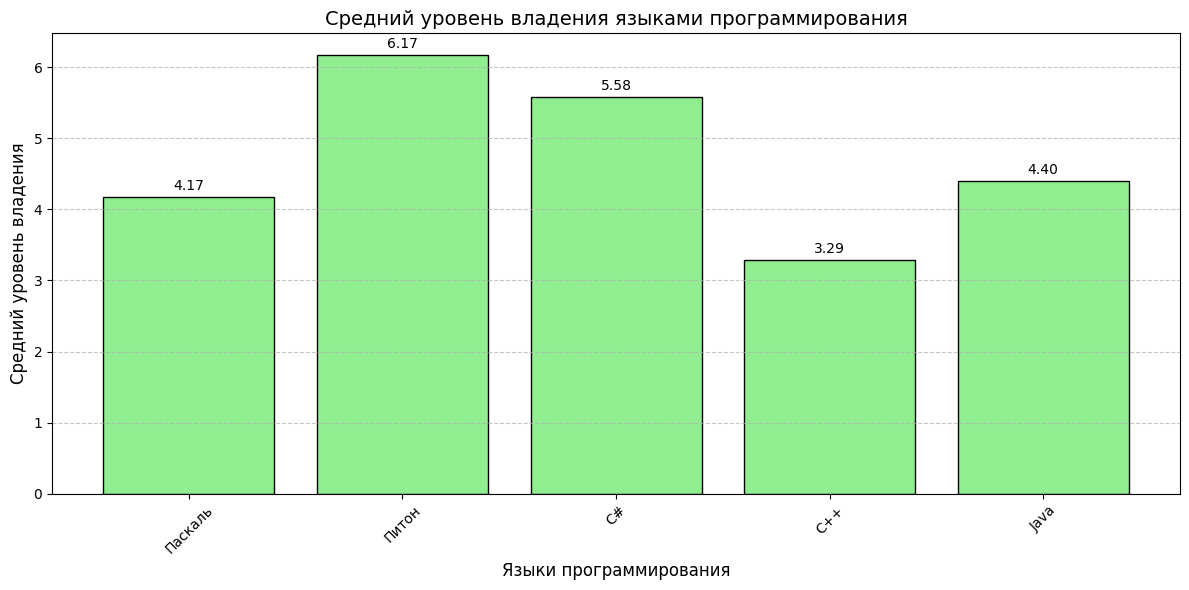

In [7]:
import matplotlib.pyplot as plt

# Средний уровень владения языками
avg_level_per_language = df.iloc[:, 1:].mean()

# Построение столбчатого графика
plt.figure(figsize=(12, 6))
plt.bar(avg_level_per_language.index, avg_level_per_language.values, color='lightgreen', edgecolor='black')

# Подписи осей и заголовок
plt.xlabel('Языки программирования', fontsize=12)
plt.ylabel('Средний уровень владения', fontsize=12)
plt.title('Средний уровень владения языками программирования', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Отображение значений над столбцами
for i, val in enumerate(avg_level_per_language.values):
    plt.text(i, val + 0.1, f"{val:.2f}", ha='center', fontsize=10)

# Показ графика
plt.tight_layout()
plt.show()

In [8]:
# Создаем DataFrame для сопоставления
comparison = pd.DataFrame({
    'Популярность (%)': popularity,
    'Средний уровень владения': avg_level_per_language
})

print("Сопоставление популярности и среднего уровня владения:")
print(comparison)

Сопоставление популярности и среднего уровня владения:
         Популярность (%)  Средний уровень владения
Паскаль             80.82                  4.169492
Питон               90.41                  6.166667
C#                  16.44                  5.583333
C++                 28.77                  3.285714
Java                 6.85                  4.400000


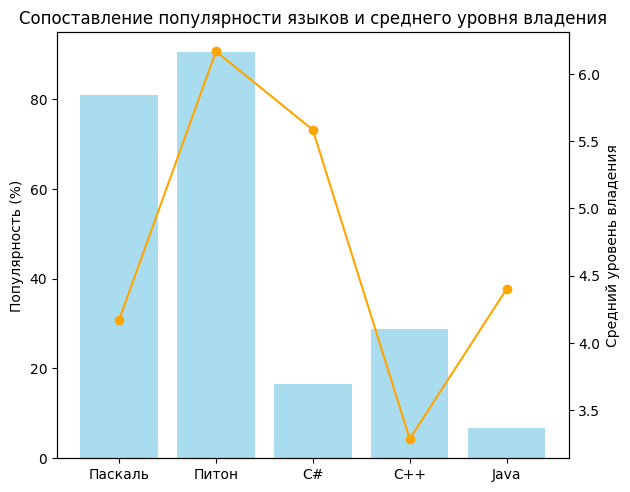

In [10]:
import matplotlib.pyplot as plt

# График
fig, ax1 = plt.subplots()

ax1.bar(comparison.index, comparison['Популярность (%)'], alpha=0.7, label='Популярность (%)', color='skyblue')
ax1.set_ylabel('Популярность (%)')

ax2 = ax1.twinx()
ax2.plot(comparison.index, comparison['Средний уровень владения'], marker='o', label='Средний уровень', color='orange')
ax2.set_ylabel('Средний уровень владения')

fig.tight_layout()
plt.title('Сопоставление популярности языков и среднего уровня владения')
plt.show()

---
## Количество языков, изучаемых студентами

In [11]:
# Подсчёт количества изучаемых языков каждым студентом
num_languages = df.iloc[:, 1:].notna().sum(axis=1)

# Группировка и подсчёт студентов по числу изучаемых языков
language_distribution = num_languages.value_counts().sort_index()

print("Количество языков, изучаемых студентами:")
print(language_distribution)

Количество языков, изучаемых студентами:
1    15
2    37
3    10
4    11
Name: count, dtype: int64


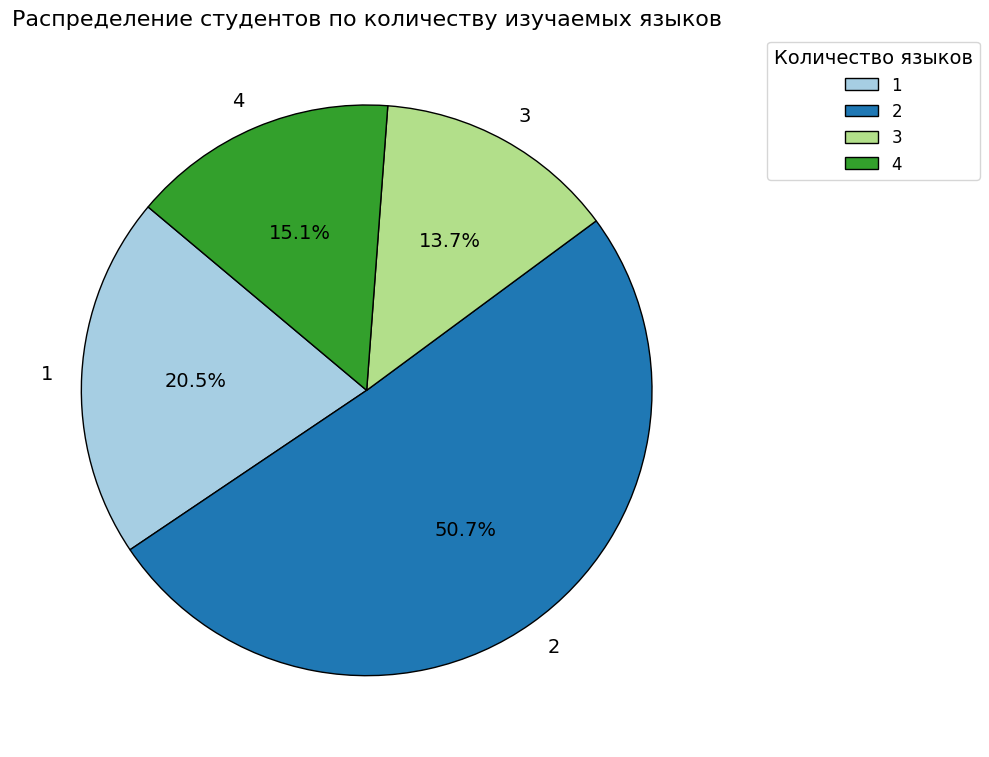

In [12]:
import matplotlib.pyplot as plt

# Построение круговой диаграммы
plt.figure(figsize=(10, 10))
plt.pie(
    language_distribution.values,  # значения
    labels=language_distribution.index,  # метки
    autopct='%1.1f%%',  # отображение процентов
    startangle=140,  # начальный угол
    colors=plt.cm.Paired.colors,  # цвета
    textprops={'fontsize': 14},  # размер текста внутри диаграммы
    wedgeprops={'edgecolor': 'black'}  # контуры
)

# Добавляем заголовок
plt.title('Распределение студентов по количеству изучаемых языков', fontsize=16)

# Легенда (вне диаграммы)
plt.legend(
    title='Количество языков',
    title_fontsize=14,
    fontsize=12,
    loc='upper left',
    bbox_to_anchor=(1.05, 1)  # позиция легенды
)

# Отображаем диаграмму
plt.tight_layout()
plt.show()